# Diamond Price Predication

The aim of diamond price prediction is to develop a model that can accurately estimate the price of a diamond based on its various attributes such as carat weight, cut quality, color, and clarity. By analyzing historical diamond data and utilizing machine learning techniques, this predictive model enables buyers, sellers, and enthusiasts to make informed decisions when buying or selling diamonds, considering factors that influence their value. The dataset we use has 219703 observations and 26 variables but we use only 13 vairables.

In [1]:
#import neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Below is the column names and description that we using to predict the price of is listed.

In [2]:
pd.read_csv("D:\Data Analysis\Projects\Diamond Price Predication\columns.csv")

,Column Name,Description
0,cut,cut refers to one of the 10 or so most common ...
1,color,Clear diamonds are graded D-Z. The higher lett...
2,clarity,"clarity refers the inclusions (i.e., internal ..."
3,carat_weight,carat_weight Refers to the mass of the diamond...
4,cut_quality,cut_quality refers the GIA Cut Grading System ...
5,lab,"lab is the grading lab. The big three are GIA,..."
6,table_percent,table_percent are the relative measurements of...
7,symmetry,polish and symmetry are what you would expect.
8,polish,polish and symmetry are what you would expect.
9,meas_length,the absolute length measurements of stone.


#### Importing the Diamond CSV data file that I downloaded from Kaggle

In [3]:
diamond = pd.read_csv("D:\Data Analysis\Projects\Diamond Price Predication\diamonds.csv")

In [4]:
diamond

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


# Data Preprocessing

#### Cheking the null values

In [5]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [6]:
diamond.isnull().sum()

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

#### Dropping the unnecessary columns that has unknown values more than 80% that will affect our model

In [7]:
diamond.drop(['Unnamed: 0', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity'], axis=1, inplace=True)

In [8]:
diamond.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,58.5,2.79,2.83,1.82,200


In [9]:
diamond.shape

(219703, 13)

In [10]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cut                219703 non-null  object 
 1   color              219703 non-null  object 
 2   clarity            219703 non-null  object 
 3   carat_weight       219703 non-null  float64
 4   cut_quality        219703 non-null  object 
 5   lab                219703 non-null  object 
 6   symmetry           219703 non-null  object 
 7   polish             219703 non-null  object 
 8   table_percent      219703 non-null  float64
 9   meas_length        219703 non-null  float64
 10  meas_width         219703 non-null  float64
 11  meas_depth         219703 non-null  float64
 12  total_sales_price  219703 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 21.8+ MB


#### Checking how many unique values in main columns have

In [11]:
diamond['cut'].nunique()

11

In [12]:
diamond['color'].nunique()

11

In [13]:
diamond['clarity'].nunique()

11

In [14]:
diamond['cut_quality'].nunique()

6

In [15]:
diamond['lab'].nunique()

3

In [16]:
diamond['symmetry'].nunique()

5

In [17]:
diamond['polish'].nunique()

5

#### Cheking descriptive statistics

In [18]:
diamond.describe()

,carat_weight,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


#### Count the values of categorical variables

In [19]:
diamond.cut.value_counts()

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: cut, dtype: int64

In [20]:
diamond.color.value_counts()

E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: color, dtype: int64

In [21]:
diamond.clarity.value_counts()

SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [22]:
diamond.cut_quality.value_counts()

Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64

In [23]:
diamond.symmetry.value_counts()

Excellent    131619
Very Good     83143
Good           4609
Fair            325
Poor              7
Name: symmetry, dtype: int64

In [24]:
diamond.polish.value_counts()

Excellent    175806
Very Good     42323
Good           1565
Fair              7
Poor              2
Name: polish, dtype: int64

In [25]:
diamond.head(10)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,58.5,2.79,2.83,1.82,200
5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,57.0,2.95,2.99,1.81,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,57.0,2.85,2.88,1.84,200
7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,59.5,2.86,2.89,1.78,200
8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,59.5,2.89,2.92,1.85,200
9,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,57.0,2.83,2.87,1.80,200


# Exploratory Data Analysis

#### Plotting the graphs to get insights of data how can we make model

<AxesSubplot: xlabel='total_sales_price', ylabel='Count'>

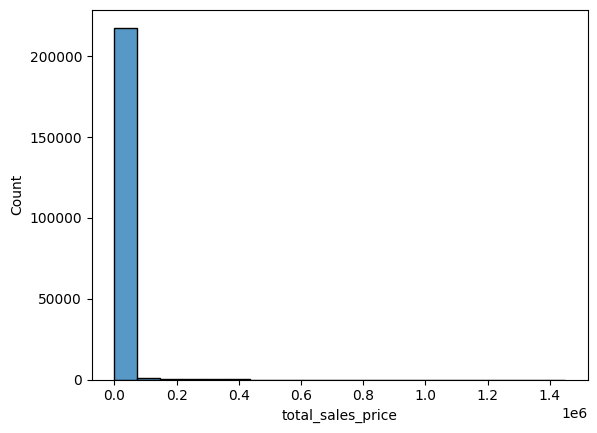

In [26]:
sns.histplot(diamond['total_sales_price'], bins=20)

<AxesSubplot: xlabel='carat_weight', ylabel='Count'>

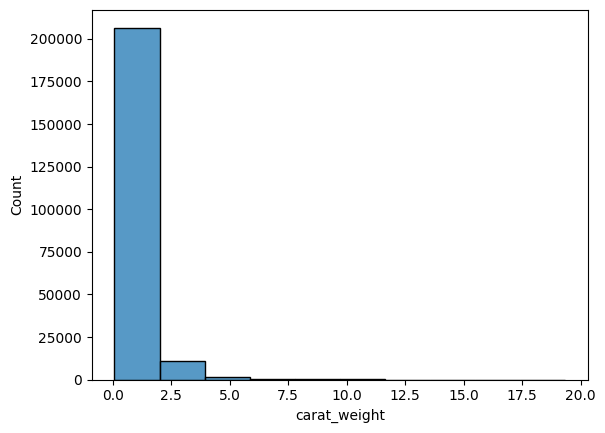

In [27]:
sns.histplot(diamond['carat_weight'], bins=10)

By this graph we can see that most of the diamonds are less then 2.5 Carat in weight

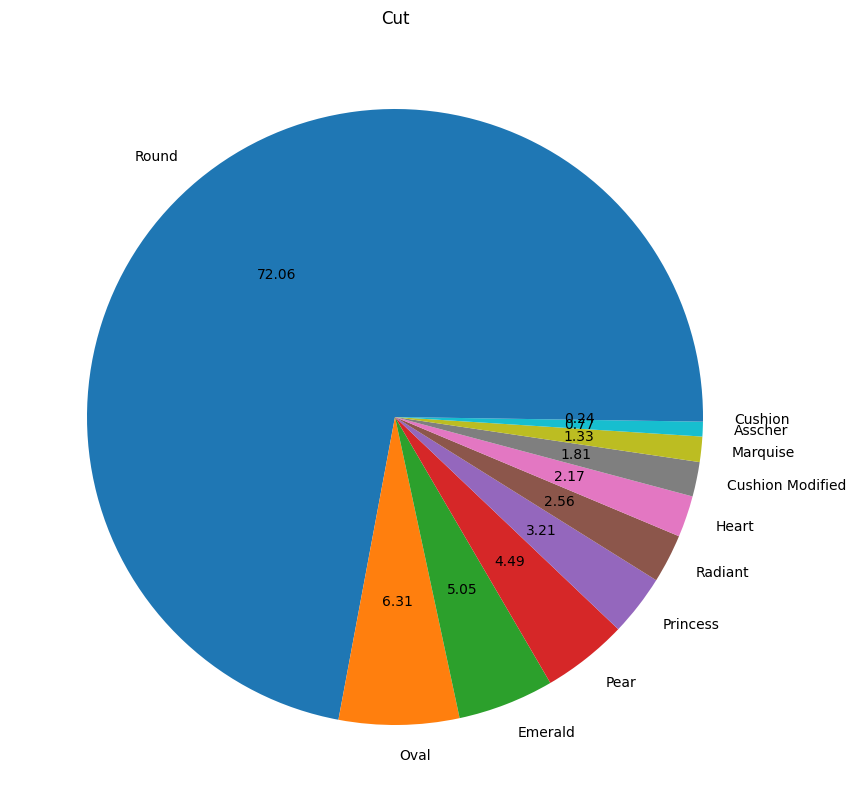

In [28]:
plt.figure(figsize = (10, 10))
plt.pie(diamond['cut'].value_counts(), labels=['Round', 'Oval', 'Emerald', 'Pear', 'Princess', 'Radiant', 'Heart', 'Cushion Modified', 'Marquise', 'Asscher', 'Cushion'], autopct="%0.2f")
plt.title('Cut')
plt.show()

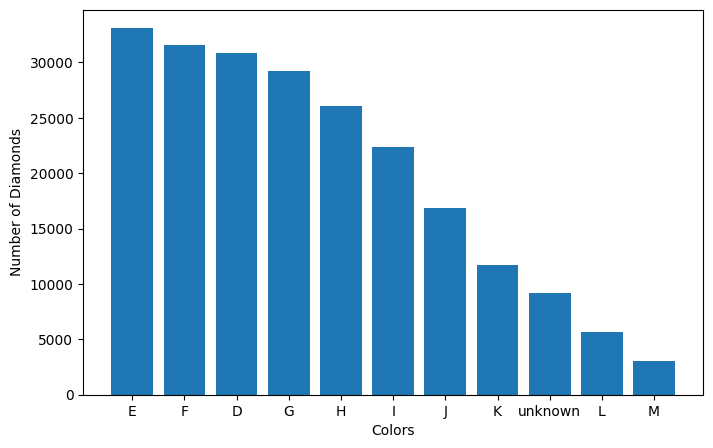

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(diamond['color'].value_counts().index, diamond['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Colors")
plt.show()

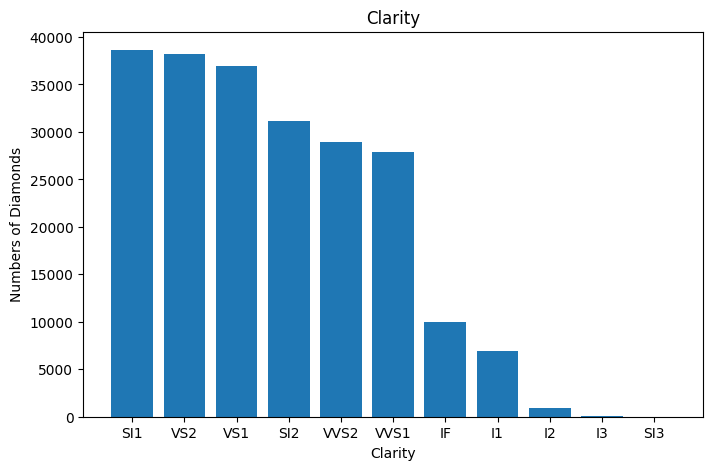

In [30]:
plt.figure(figsize=(8,5))
plt.bar(diamond['clarity'].value_counts().index, diamond['clarity'].value_counts())
plt.title("Clarity")
plt.ylabel("Numbers of Diamonds")
plt.xlabel("Clarity")
plt.show()

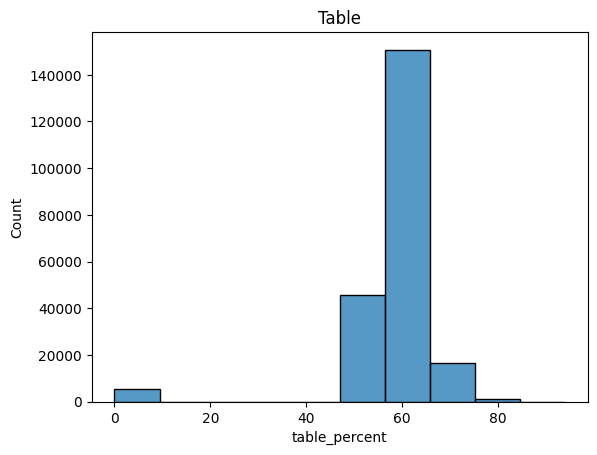

In [31]:
sns.histplot(diamond['table_percent'], bins=10)
plt.title("Table")
plt.show()

# Comparing Diamond's Features with Price

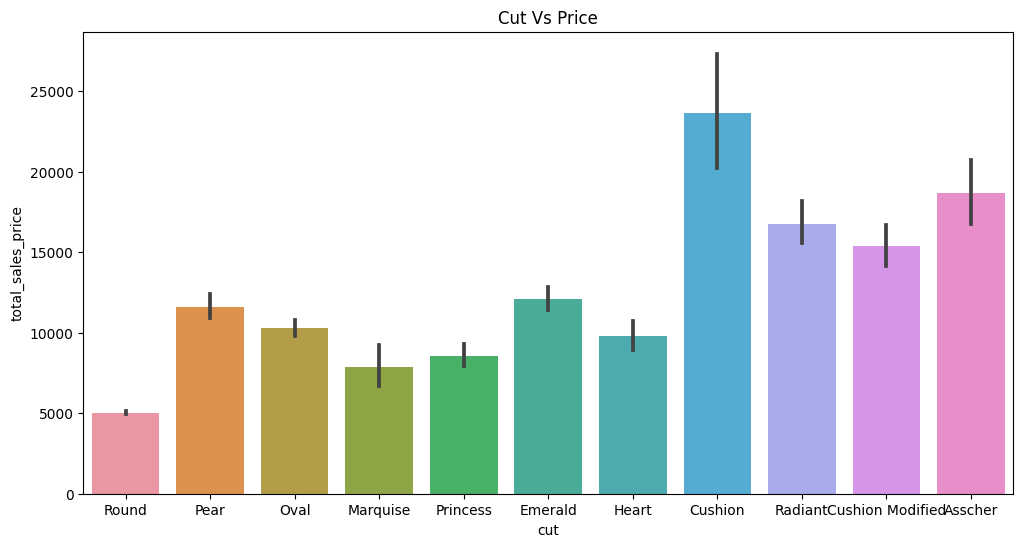

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x='cut', y='total_sales_price', data=diamond)
plt.title("Cut Vs Price")
plt.show()

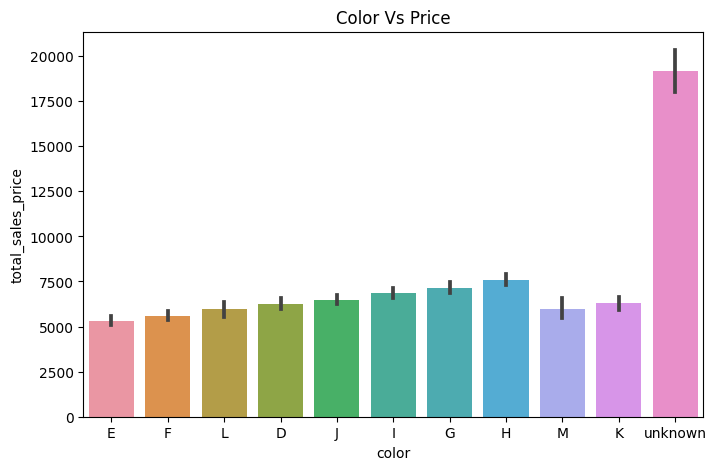

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='color', y='total_sales_price', data=diamond)
plt.title("Color Vs Price")
plt.show()

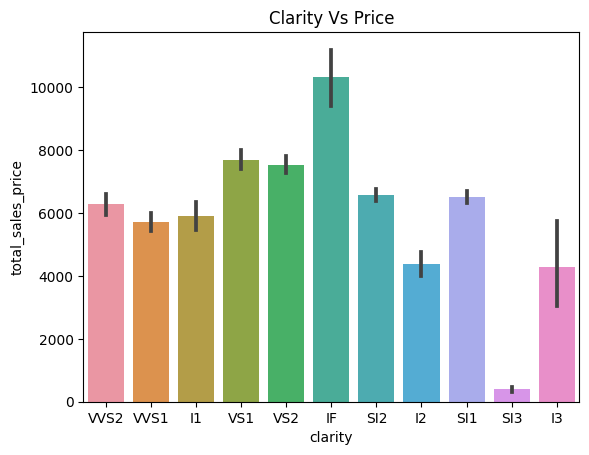

In [34]:
sns.barplot(x='clarity', y='total_sales_price', data=diamond)
plt.title("Clarity Vs Price")
plt.show()

M color and I3 clarity are worst features of diamond, however when the data is plotted on bar graph, it is seen that the price of M color and I3 is lower than the price of diamond of D color and IF clarity as they are the best feature of diamonds

# Data Preprocessing to change categorical to numeric

In [35]:
diamond['cut'] = diamond['cut'].map({'Round':11,'Oval':9,'Emerald':10, 'Pear':8,'Princess':7,'Radiant':5,'Heart':3, 'Cushion Modified':1, 'Marquise':2,'Asscher':4,'Cushion':6})
diamond['color'] = diamond['color'].map({'E':9, 'F':8, 'D':10, 'G':7, 'H':6, 'I':5, 'J':4, 'K':3, 'unknown':11, 'L':2,'M':1})
diamond['clarity'] = diamond['clarity'].map({'SI1':6, 'VS2':7,'VS1':8,'SI2':5,'VVS2':9,'VVS1':10,'IF':11,'I1':3,'I2':2,'I3':1, 'SI3':4})
diamond['cut_quality'] = diamond['cut_quality'].map({'Excellent':5,'unknown':0,'Very Good':4,'Good':3, 'Fair':2,'Ideal':1})
diamond['symmetry'] = diamond['symmetry'].map({'Excellent':4,'Very Good':4,'Good':3, 'Fair':2,'Poor':1})
diamond['polish'] = diamond['polish'].map({'Excellent':5,'Very Good':4,'Good':3, 'Fair':2,'Poor':1})

In [36]:
diamond.drop('lab', axis=1, inplace=True)

In [37]:
diamond.head()

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,11,9,9,0.09,5,4,4,59.0,2.85,2.87,1.79,200
1,11,9,9,0.09,4,4,4,59.0,2.84,2.89,1.78,200
2,11,9,9,0.09,5,4,4,59.0,2.88,2.90,1.77,200
3,11,9,9,0.09,5,4,4,59.0,2.86,2.88,1.78,200
4,11,9,9,0.09,4,4,5,58.5,2.79,2.83,1.82,200


# Correlation

In [38]:
diamond.corr()

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,total_sales_price
cut,1.000000,-0.184921,0.076725,-0.208087,0.757709,0.326102,0.237122,-0.134410,-0.284844,-0.077052,-0.061145,-0.098456
color,-0.184921,1.000000,0.010645,-0.102915,-0.141346,-0.239464,-0.107078,-0.003085,-0.112455,-0.179592,-0.068130,0.023286
clarity,0.076725,0.010645,1.000000,-0.105747,0.072141,0.097869,0.126664,0.012751,-0.153244,-0.139439,-0.055404,0.009665
carat_weight,-0.208087,-0.102915,-0.105747,1.000000,-0.247205,-0.071656,-0.012959,0.090697,0.782683,0.788912,0.350719,0.745963
cut_quality,0.757709,-0.141346,0.072141,-0.247205,1.000000,0.234340,0.286634,-0.208497,-0.413258,-0.020557,-0.054241,-0.107072
symmetry,0.326102,-0.239464,0.097869,-0.071656,0.234340,1.000000,0.301732,0.027208,-0.058804,0.002165,-0.009468,-0.063568
polish,0.237122,-0.107078,0.126664,-0.012959,0.286634,0.301732,1.000000,-0.004962,-0.048063,0.073572,0.011241,-0.008245
table_percent,-0.134410,-0.003085,0.012751,0.090697,-0.208497,0.027208,-0.004962,1.000000,0.165742,0.141250,0.082533,0.045192
meas_length,-0.284844,-0.112455,-0.153244,0.782683,-0.413258,-0.058804,-0.048063,0.165742,1.000000,0.788652,0.342209,0.489218
meas_width,-0.077052,-0.179592,-0.139439,0.788912,-0.020557,0.002165,0.073572,0.141250,0.788652,1.000000,0.412933,0.506403


### Plotting Correlation Heatmap

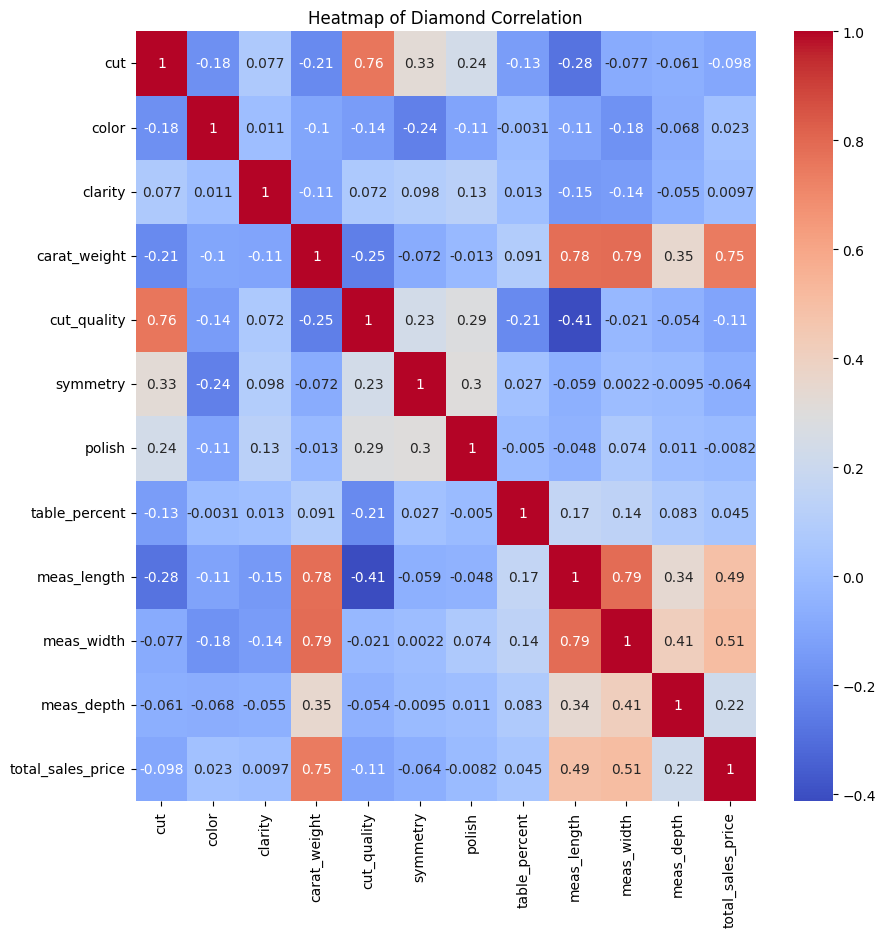

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(diamond.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Diamond Correlation")
plt.show()

### Plotting the relationship between Carat and Price

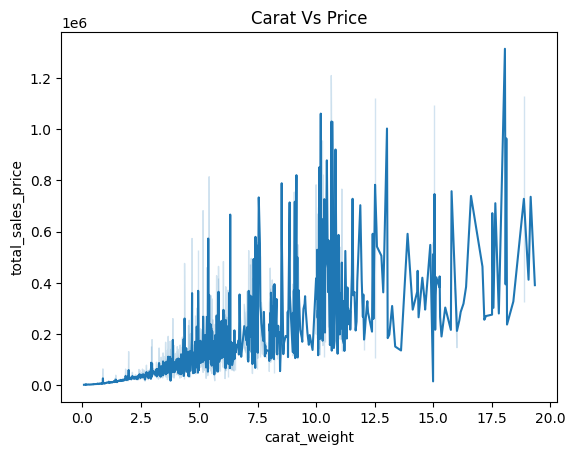

In [40]:
sns.lineplot(x = 'carat_weight', y = 'total_sales_price', data=diamond)
plt.title("Carat Vs Price")
plt.show()

We can see that the price of diamond and not constant, it increasing with carat of the diamonds. We can see that diamonds with high carats are also low prices that is because of the other factors that affects the price of the diamond

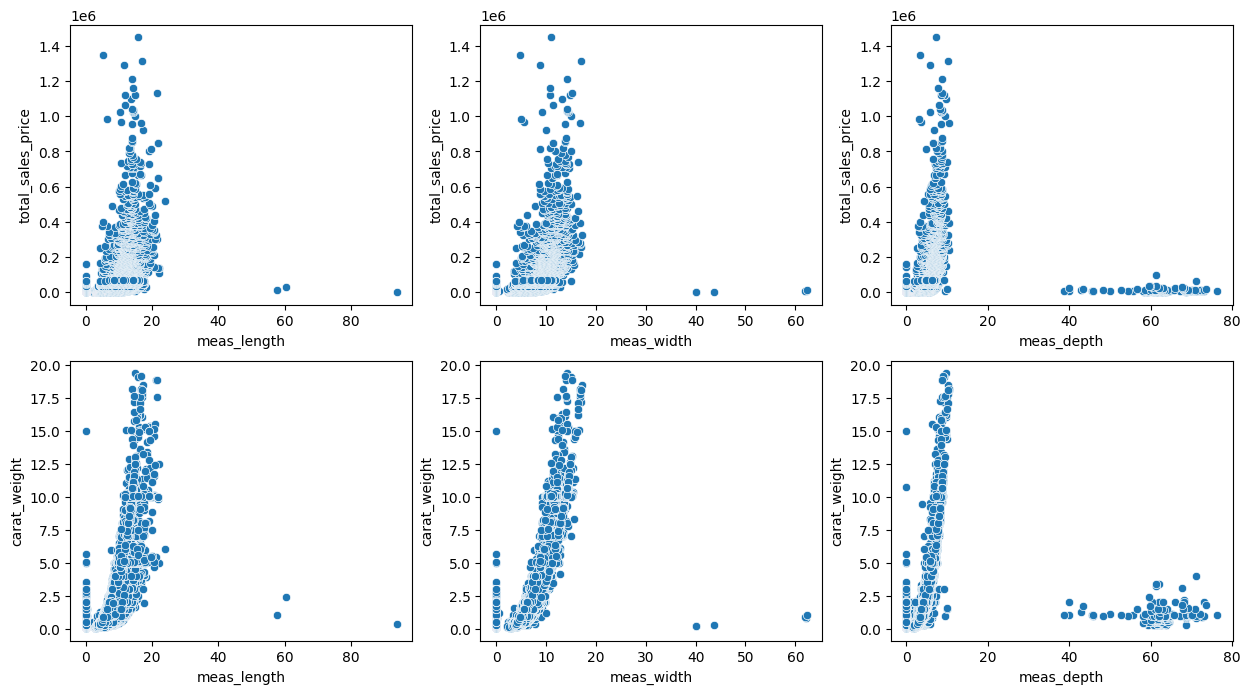

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
sns.scatterplot(x='meas_length', y='total_sales_price', data=diamond, ax=ax[0,0])
sns.scatterplot(x='meas_width', y='total_sales_price', data=diamond, ax=ax[0,1])
sns.scatterplot(x='meas_depth', y='total_sales_price', data=diamond, ax=ax[0,2])
sns.scatterplot(x='meas_length', y='carat_weight', data=diamond, ax=ax[1,0])
sns.scatterplot(x='meas_width', y='carat_weight', data=diamond, ax=ax[1,1])
sns.scatterplot(x='meas_depth', y='carat_weight', data=diamond, ax=ax[1,2])
plt.show()

Majority of diamonds length is between 0 to 20, width is between 0 to 15 and depth is between 0 to 10 with other dimensions are very rare.

# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(diamond.drop('total_sales_price', axis=1), diamond['total_sales_price'], test_size=0.2)

In [44]:
len(x_train)

175762

In [45]:
len(x_test)

43941

# Model Building

### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor()

In [48]:
dt

DecisionTreeRegressor()

In [49]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9999899302796564

In [50]:
dt_predict = dt.predict(x_test)

In [64]:
dt_predict

array([10140.,   842., 11145., ...,   796.,  1034.,  6192.])

### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor()

In [53]:
rf

RandomForestRegressor()

In [54]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9746159274247247

In [55]:
rf_predict = rf.predict(x_test)

In [65]:
rf_predict

array([ 9714.82 ,   841.736, 10418.7  , ...,   771.02 ,   996.115,
        6044.94 ])

# Model Evalution

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Decision Tree Regressor

Distribution plot between actual value and predicated value

C:\Users\Admin\AppData\Local\Temp\ipykernel_16292\1158408235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16292\1158408235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

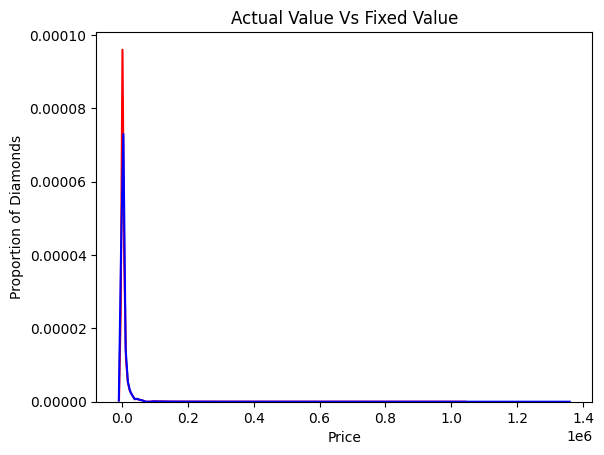

In [57]:
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_predict,hist=False,color='b',label='Fixed Value', ax=ax)
plt.title("Actual Value Vs Fixed Value")
plt.xlabel("Price")
plt.ylabel("Proportion of Diamonds")
plt.show()

In [58]:
print("Decision Tree Regressor RMSE:", np.sqrt(mean_squared_error(y_test,dt_predict)))
print("Decision Tree Regressor Accuracy:", dt.score(x_test,y_test))
print("Decision Tree Regressor RME:", mean_absolute_error(y_test,dt_predict))

Decision Tree Regressor RMSE: 14492.482980436831
Decision Tree Regressor Accuracy: 0.6738188137017659
Decision Tree Regressor RME: 1513.5783096681505


### Random Forest Regressor

Distribution plot between actual value and predicated value

C:\Users\Admin\AppData\Local\Temp\ipykernel_16292\399982518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label="Actual Value")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16292\399982518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

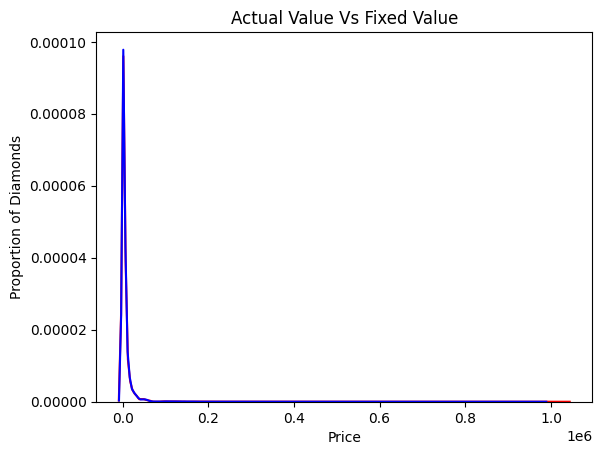

In [59]:
ax = sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(rf_predict, hist=False,color='b',label="Fixed Value", ax=ax)
plt.title("Actual Value Vs Fixed Value")
plt.xlabel("Price")
plt.ylabel("Proportion of Diamonds")
plt.show()

In [60]:
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test,rf_predict)))
print("Random Forest Regressor Accuracy:", rf.score(x_test,y_test))
print("Random Forest Regressor RME:", mean_absolute_error(y_test,rf_predict))

Random Forest Regressor RMSE: 9958.7504175711
Random Forest Regressor Accuracy: 0.8459779119954993
Random Forest Regressor RME: 1213.3435022634228


# Predication

In [67]:
def predication():
    carat_weight = input("Enter the value of Carat from 0.00 to 20.00: ")
    print("'Round':11,'Oval':9,'Emerald':10, 'Pear':8,'Princess':7,'Radiant':5,'Heart':3, 'Cushion Modified':1, 'Marquise':2,'Asscher':4,'Cushion':6")
    cut  = input("Enter the Cut Value from Above List: ")
    print("'SI1':6, 'VS2':7,'VS1':8,'SI2':5,'VVS2':9,'VVS1':10,'IF':11,'I1':3,'I2':2,'I3':1, 'SI3':4")
    clarity  = input("Enter the Clarity Value from Above List: ")
    print("'E':9, 'F':8, 'D':10, 'G':7, 'H':6, 'I':5, 'J':4, 'K':3, 'unknown':11, 'L':2,'M':1")
    color  = input("Enter the Color Value from Above List: ")
    print("'Excellent':5,'unknown':0,'Very Good':4,'Good':3, 'Fair':2,'Ideal':1")
    cut_quality  = input("Enter the Cut Quality Value from Above List: ")
    print("'Excellent':4,'Very Good':4,'Good':3, 'Fair':2,'Poor':1")
    symmetry  = input("Enter the Symmetry Value from Above List: ")
    print("'Excellent':5,'Very Good':4,'Good':3, 'Fair':2,'Poor':1")
    polish  = input("Enter the Polish Value from Above List: ")
    table_percent  = input("Enter the Table Percent Value: ")
    meas_length  = input("Enter the Lenth Value: ")
    meas_width  = input("Enter the Width Value: ")
    meas_depth  = input("Enter the Depth Value: ")
    
    price = rf.predict([[cut, color, clarity, carat_weight, cut_quality, symmetry, polish, table_percent, meas_length, meas_width, meas_depth]])
    
    print("Approximately Price of Diamond is: $ ", price)
    
predic = predication()

predic

Enter the value of Carat from 0.00 to 20.00: .4
'Round':11,'Oval':9,'Emerald':10, 'Pear':8,'Princess':7,'Radiant':5,'Heart':3, 'Cushion Modified':1, 'Marquise':2,'Asscher':4,'Cushion':6
Enter the Cut Value from Above List: 10
'SI1':6, 'VS2':7,'VS1':8,'SI2':5,'VVS2':9,'VVS1':10,'IF':11,'I1':3,'I2':2,'I3':1, 'SI3':4
Enter the Clarity Value from Above List: 10
'E':9, 'F':8, 'D':10, 'G':7, 'H':6, 'I':5, 'J':4, 'K':3, 'unknown':11, 'L':2,'M':1
Enter the Color Value from Above List: 7
'Excellent':5,'unknown':0,'Very Good':4,'Good':3, 'Fair':2,'Ideal':1
Enter the Cut Quality Value from Above List: 0
'Excellent':4,'Very Good':4,'Good':3, 'Fair':2,'Poor':1
Enter the Symmetry Value from Above List: 3
'Excellent':5,'Very Good':4,'Good':3, 'Fair':2,'Poor':1
Enter the Polish Value from Above List: 5
Enter the Table Percent Value: 68
Enter the Lenth Value: 5.07
Enter the Width Value: 3.49
Enter the Depth Value: 2.24
Approximately Price of Diamond is: $  [1344.16]


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Conclusion

Both the model have very much different in accuracy. However the Random Forest Regressor is more better and accurate than the Decision Tree Regressor.